# Insurance Data - Decision Tree & Random Forest

### Table of Contents

1. [Data Loading and Understanding](#section1)</br>
2. [Data Preprocessing](#section2)</br>
    - 2.1 [Removing the columns with more than 50% missing values](#section201)</br>
    - 2.2 [Replacing the missing values with mean since all are numerical and standardized variables](#section202)</br>
    - 2.3 [Removing irrelevant columns & Preparing data](#section203)</br>
    - 2.4 [Preparing X & y](#section204)</br>
    - 2.5 [Splitting X & y into train and test](#section205)</br>
3. [Decision Tree Model](#section3)</br>
    - 3.1 [Using the model for Prediction](#section301)</br>
    - 3.2 [odel Evaluation using Confusion Matrix](#section302)</br>   
    - 3.2 [Calculating Precision, Recall, F1, Average Precision scores](#section303)</br>
4. [Random Forest Model](#section4)</br>
    - 4.1 [Using the model for Prediction](#section401)</br>
    - 4.2 [Calculating Precision, Recall, F1, Average Precision scores](#section402)</br>
    - 4.3 [Random Forest Model with RandomizedSearchCV](#section403)</br>

<a id=section1></a>
### 1. Data Loading and Understanding

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

insurance_data = 'https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv'
insurance = pd.read_csv(insurance_data)

In [4]:
insurance.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


<a id=section2></a>
### 2. Data Preprocessing

<a id=section201></a>
#### 2.1 Removing the columns with more than 50% missing values

In [5]:
half_count = len(insurance)/2
print('The threshold for missing values is:', half_count)
insurance = insurance.dropna(thresh=half_count, axis=1)
insurance.shape

The threshold for missing values is: 29690.5


(59381, 122)

<a id=section202></a>
#### 2.2 Replacing the missing values with mean since all are numerical and standardized variables

In [6]:
#Collecting the columns with missing values in a list
col_missing_data = insurance.columns[insurance.isnull().any()].tolist()
print(col_missing_data)

#Replacing the missing values with respective mean as all are standardized values
for col in col_missing_data:
    insurance[col] = insurance[col].fillna(insurance[col].mean())

#Checking for any null values 
insurance.isnull().sum()

['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_4', 'Medical_History_1']


Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
                      ..
Medical_Keyword_20     0
Medical_Keyword_21     0
Medical_Keyword_22     0
Medical_Keyword_23     0
Medical_Keyword_24     0
Medical_Keyword_25     0
Medical_Keyword_26     0
Medical_Keyword_27     0
Medical_Keyword_28     0


<a id=section203></a>
#### 2.3 Removing irrelevant columns & Preparing data

In [7]:
#Remoing id column for no much decision should be made based on id
#insurance = insurance.drop('Id', axis=1)
print(insurance.shape)

#Cehcking for categorical columns
print('Categorical features:',insurance.columns[insurance.dtypes == object])
print('Unique categorical values of Product_Info_2:', insurance.Product_Info_2.unique())

(59381, 122)
Categorical features: Index(['Product_Info_2'], dtype='object')
Unique categorical values of Product_Info_2: ['D3' 'A1' 'E1' 'D4' 'D2' 'A8' 'A2' 'D1' 'A7' 'A6' 'A3' 'A5' 'C4' 'C1'
 'B2' 'C3' 'C2' 'A4' 'B1']


#### Creating Dummy variables

In [8]:
dummy_data = pd.get_dummies(insurance, columns=['Product_Info_2'], drop_first=True)
print(dummy_data.shape)
final_data = dummy_data.copy()

(59381, 139)


<a id=section204></a>
#### 2.4 Preparing X & y

In [9]:
X = final_data.loc[:, final_data.columns != 'Response']
y = final_data.Response
print(X.shape)
print(y.shape)

(59381, 138)
(59381,)


<a id=section205></a>
#### 2.5 Splitting X & y into train and test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(y_train.shape)

(41566, 138)
(41566,)


<a id=section3></a>
### 3. Decision Tree Model

In [11]:
from sklearn import tree
dtc_model = tree.DecisionTreeClassifier(random_state=0)

#fitting the model
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


####  Generating Decision Tree Image

In [12]:
#from graphviz import Source

#graph = Source(tree.export_graphviz(dtc_model, out_file=None, filled=True, rounded=True, 
#                                   special_characters=True, feature_names=X.columns))
#graph.format = 'png'
#graph.render('dtree_insurance', view=True)

<a id=section301></a>
#### 3.1 Using the model for Prediction

In [13]:
y_pred_train = dtc_model.predict(X_train)
y_pred_test = dtc_model.predict(X_test)

#### Model Evaluation using Accuracy Score

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy Score for test data is:', accuracy_score(y_test, y_pred_test))

Accuracy Score for test data is: 0.3959023294976144


<a id=section302></a>
#### 3.2 Model Evaluation using Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

# Response being the target variable which is ordinal:
# AR is Actual Response and PR is Predicted Response
confusion_matrix.index = ['AR-1', 'AR-2', 'AR-3', 'AR-4','AR-5', 'AR-6', 'AR-7', 'AR-8']
confusion_matrix.columns = ['PR-1', 'PR-2', 'PR-3', 'PR-4','PR-5', 'PR-6', 'PR-7', 'PR-8']
print(confusion_matrix)

      PR-1  PR-2  PR-3  PR-4  PR-5  PR-6  PR-7  PR-8
AR-1   389   373    47    31   209   331   251   318
AR-2   306   470    51    35   239   367   211   279
AR-3    36    49    29    17    70    64    31    20
AR-4    32    23    16    53     7   121    53   110
AR-5   185   274    75    14   623   257    90   108
AR-6   354   346    61   110   254  1101   496   597
AR-7   194   195    22    42   101   514   716   605
AR-8   291   271    29   114   113   646   707  3672


<a id=section303></a>
#### 3.3 Calculating Precision, Recall, F1,  Average Precision Scores, ROC_AUC score

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred_test, average='micro')
print('Precision score is:', precision)

recall = recall_score(y_test, y_pred_test, average='micro')
print('Recall score is:', recall)

f1score = f1_score(y_test, y_pred_test, average='micro')
print('F1 score is:', f1score)

Precision score is: 0.3959023294976144
Recall score is: 0.3959023294976144
F1 score is: 0.3959023294976144


#### ROC_AUC score

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

final_data_sample=final_data.sample(500)

X = final_data_sample.loc[:, final_data_sample.columns != 'Response']
y = final_data_sample.Response

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9,10])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


D:\Personal\Softwares\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


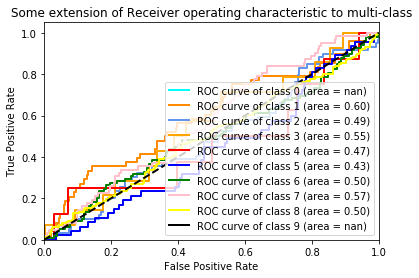

In [45]:
plt.figure()
lw = 2
colors = ['aqua', 'darkorange', 'cornflowerblue','orange','red','blue','green','pink','yellow','black']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

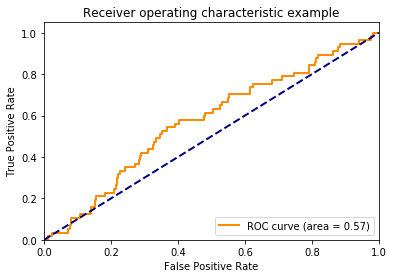

In [39]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<a id=section4></a>
### 4 Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

y_pred_train_r = model.predict(X_train)
y_pred_test_r = model.predict(X_test)

<a id=section401></a>
#### 4.1 Model Evaluation

In [46]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test, y_pred_test_r))

Accuracy score for test data is: 0.47241088969969125


In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_r))
confusion_matrix

,0,1,2,3,4,5,6,7
0,429,373,9,17,155,405,186,375
1,319,482,4,16,236,384,170,347
2,46,26,15,12,87,90,10,30
3,32,14,5,37,4,142,27,154
4,144,241,23,6,709,291,83,129
5,303,260,4,39,228,1414,378,693
6,142,117,2,20,71,614,638,785
7,104,77,4,42,30,557,337,4692


<a id=section402></a>
#### 4.2 Calculating Precision, Recall, F1, Average Precision scores

In [48]:
precision_r = precision_score(y_test, y_pred_test_r, average='micro')
print('The Precision score for RandomForest model is:', precision_r)

recall_r = recall_score(y_test, y_pred_test_r, average='micro')
print('The Recall score for RandomForest model is:', recall_r)

F1score_r = f1_score(y_test, y_pred_test_r, average='micro')
print('The F1 Score for RandomForest model is:', F1score_r)

The Precision score for RandomForest model is: 0.47241088969969125
The Recall score for RandomForest model is: 0.47241088969969125
The F1 Score for RandomForest model is: 0.47241088969969125


<a id=section403></a>
### 4.3 Random Forest Model with RandomizedSearchCV

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randit

#Parameters for GridSearchCV
param_dist = {'max_depth': range(2,5),
              'min_samples_split': sp_randit(2,11),
              'min_samples_leaf': sp_randit(1,11),
              'bootstrap': [True, False],
              'n_estimators': [100, 400, 700, 1000, 1500],
              'criterion': ['gini', 'entropy'],
              'max_features': ['sqrt', 'log2', None]
    
            }

#run randomized search 
n_iter_search = 10
random_search = RandomizedSearchCV(model, param_distributions = param_dist, n_iter=n_iter_search, n_jobs=-1)

In [ ]:
#Fitting the model
random_search.fit(X_train, y_train)

#Prediction
y_pred_test_randomCV = random_search.predict(X_test)

#Accuracy Score
print('Accuracy score for RandomizedSearchCV is:', accuracy_score(y_test, y_pred_test_randomCV))